# Exercises: Linear Correlation Analysis

## Lecture Link : 
https://www.quantopian.com/lectures/linear-correlation-analysis

###IMPORTANT NOTE: 
This lecture corresponds to the Linear Correlation Analysis lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [1]:
# Useful Functions
def find_most_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0,1]
            if result > max_value:
                pair = (keys[i], keys[j])
                max_value = result
    return pair, max_value

In [2]:
# Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# Exercise 1: Dependence of Artificial Variables

## a. Finding Variance, Covariance, and Correlation I

By reading the matrix output from the `np.cov()` and `np.corrcoef()` functions, find the variance of the variables $A$ and $B$ and the covariance and correlation of their relationship. 

In [7]:
A = np.random.rand(100)
B = -3 * A + np.random.exponential(0.05, 100)

covm = np.cov(A, B)
corrm = np.corrcoef(A, B)

print 'Covariance matrix: \n' + str(covm) + '\n'
print 'Correlation matrix: \n' + str(corrm) + '\n'

print 'Variance of A: ' + str(covm[0,0])
print 'Variance of B: ' + str(covm[1,1]) + '\n'

print 'Covariance of A and B: ' + str(covm[1,0])
print 'Correlation of A and B: ' + str(corrm[1,0])


Covariance matrix: 
[[ 0.07501156 -0.22563059]
 [-0.22563059  0.68072853]]

Correlation matrix: 
[[ 1.         -0.99849734]
 [-0.99849734  1.        ]]

Variance of A: 0.0750115562988
Variance of B: 0.680728532466

Covariance of A and B: -0.22563058918
Correlation of A and B: -0.998497340104


## b. Finding Variance, Covariance, and Correlation II

By reading the matrix output from the `np.cov()` and `np.corrcoef()` functions, find the variance of the variables $C$ and $D$ and the covariance and correlation of their relationship. 

In [15]:
C = np.random.rand(100)
D = np.random.normal(0, 0.5, 100)

covm = np.cov(C, D)
corrm = np.corrcoef(C, D)

print 'Covariance matrix: \n' + str(covm) + '\n'
print 'Correlation matrix: \n' + str(corrm) + '\n'

print 'Variance of C: ' + str(covm[0,0])
print 'Variance of D: ' + str(covm[1,1]) + '\n'

print 'Covariance of C and D: ' + str(covm[1,0])
print 'Correlation of C and D: ' + str(corrm[1,0])

Covariance matrix: 
[[ 0.0906071  -0.01268612]
 [-0.01268612  0.26417373]]

Correlation matrix: 
[[ 1.        -0.0819979]
 [-0.0819979  1.       ]]

Variance of C: 0.0906070990888
Variance of D: 0.264173726707

Covariance of C and D: -0.0126861151739
Correlation of C and D: -0.08199789913


----

# Exercise 2: Constructing Example Relationships

## a. Positive Correlation Example

Construct a variable $Y$ which has a strong, but not perfect, positive correlation with $X$ $(0.9 < Corr(X,Y) < 1)$, and plot their relationship.

Correlation: 0.955741489758


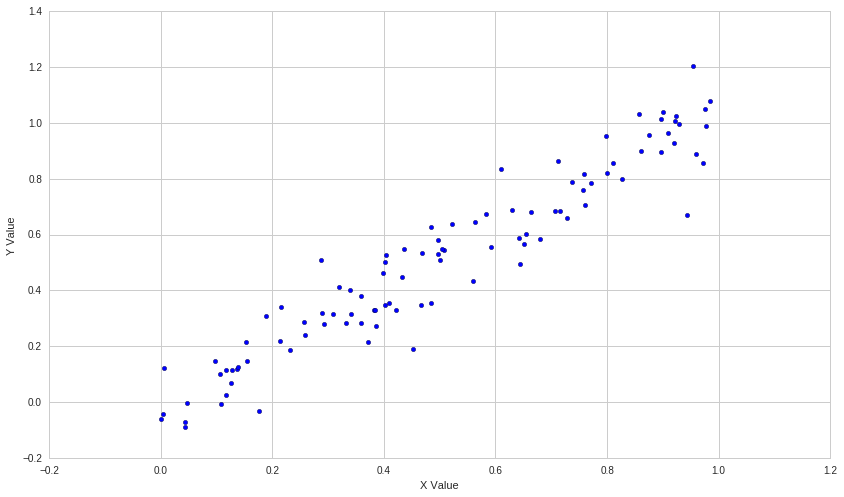

In [22]:
X = np.random.rand(100)

Y = X + np.random.normal(0, 0.1, 100)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print 'Correlation: ' + str(np.corrcoef(X, Y)[0, 1])

## b. Negative Correlation Example

Construct a variable $W$ which has a weak, negative correlation with $Z$ $(-0.3 < Corr(Z,W) < 0)$, and plot their relationship.

Correlation: -0.549553896438


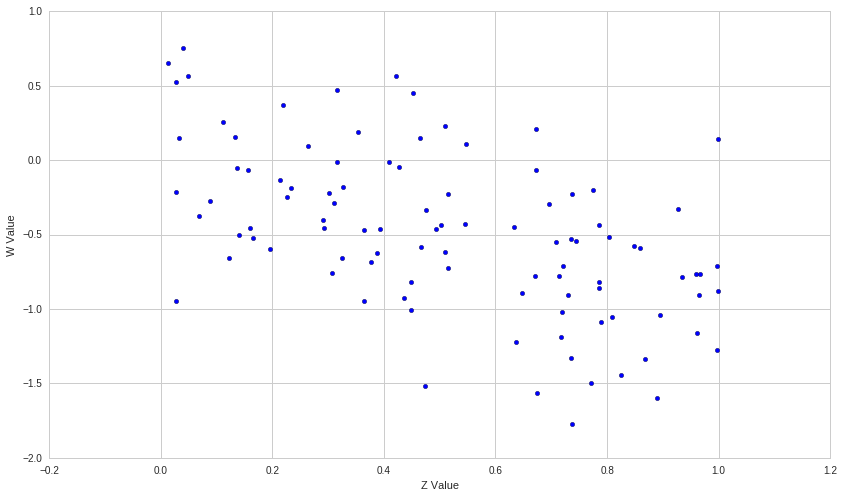

In [25]:
Z = np.random.rand(100)

W = -Z + np.random.normal(0, .5, 100)

plt.scatter(Z,W)
plt.xlabel('Z Value')
plt.ylabel('W Value')

print 'Correlation: ' + str(np.corrcoef(Z, W)[0, 1])

----

# Exercise 3: Correlation of Real Assets

## a. Finding Correlation of Real Assets

Find the correlation between the stocks OKE and LAKE. Also check how they correlate with the provided benchmark.

Correlation coefficients
OKE and LAKE:  0.446484870844
OKE and SPY:  0.853638499475
LAKE and SPY:  0.625923407419


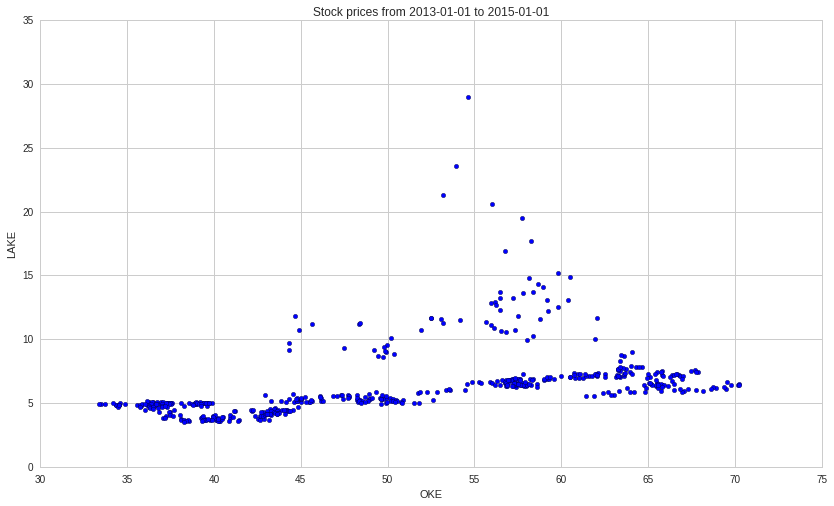

In [28]:
OKE = get_pricing('OKE', fields='price', start_date='2013-01-01', end_date='2015-01-01')
LAKE = get_pricing('LAKE', fields='price', start_date='2013-01-01', end_date='2015-01-01')
benchmark = get_pricing('SPY', fields='price', start_date='2013-01-01', end_date='2015-01-01')

plt.scatter(OKE,LAKE)
plt.xlabel('OKE')
plt.ylabel('LAKE')
plt.title('Stock prices from ' + '2013-01-01' + ' to ' + '2015-01-01')
print "Correlation coefficients"
print "OKE and LAKE: ", np.corrcoef(OKE,LAKE)[0,1]
print "OKE and SPY: ", np.corrcoef(OKE,benchmark)[0,1]
print "LAKE and SPY: ", np.corrcoef(benchmark,LAKE)[0,1]


## b. Finding Correlated Pairs

Find the most correlated pair of stocks in the following portfolio using 2015 pricing data and the `find_most_correlated` function defined in the Helper Functions section above.

In [42]:
# Useful Functions
def find_least_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    min_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0,1]
            if result < min_value:
                pair = (keys[i], keys[j])
                min_value = result
    return pair, min_value

In [43]:
symbol_list = ['GSK', 'SNOW', 'FB', 'AZO', 'XEC', 'AMZN']
data = get_pricing(symbol_list, fields=['price']
                               , start_date='2015-01-01', end_date='2016-01-01')['price']
data.columns = symbol_list

print find_most_correlated(data)
print find_least_correlated(data)

(('FB', 'AMZN'), 0.95751089566007552)
(('GSK', 'AMZN'), -0.53305301249535375)


----

# Exercise 4: Limitations of Correlation

## a. Out of Sample Tests

Using pricing data from the first half of 2016, find the correlation coefficient between FB and AMZN and compare it to the strong positive relationship predicted from the 2015 correlation coefficient to see if that result holds.

In [44]:
FB_15 = get_pricing('FB', fields='price', start_date='2015-01-01', end_date='2016-01-01')
AMZN_15 = get_pricing('AMZN', fields='price', start_date='2015-01-01', end_date='2016-01-01')

FB_16 = get_pricing('FB', fields='price', start_date='2016-01-01', end_date='2016-07-01')
AMZN_16 = get_pricing('AMZN', fields='price', start_date='2016-01-01', end_date='2016-07-01')

#Your code goes here

print "Correlation coefficient of FB_15 and AMZN_15: ", np.corrcoef(FB_15, AMZN_15)[0,1]
print "Correlation coefficient of FB_16 and AMZN_16: ", np.corrcoef(FB_16, AMZN_16)[0,1]

Correlation coefficient of FB_15 and AMZN_15:  0.95751089566
Correlation coefficient of FB_16 and AMZN_16:  0.651288727673


## b. Rolling Correlation

Plot the 60-day rolling correlation coefficient between FB and AMZN to make a conclusion about the stability of their relationship.

Upon further investigation, FB and AMZN do not consistently have the strong correlation suggested by our result from question 3b.


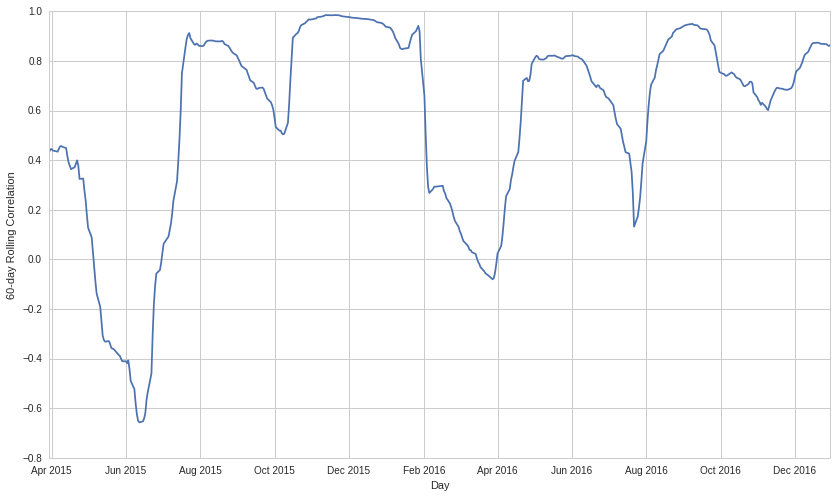

In [50]:
FB = get_pricing('FB', fields='price', start_date='2015-01-01', end_date='2017-01-01')
AMZN = get_pricing('AMZN', fields='price', start_date='2015-01-01', end_date='2017-01-01')

#Your code goes here

rolling_correlation = FB.rolling(window=60).corr(AMZN)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')
print "Upon further investigation, FB and AMZN do not consistently have the strong correlation suggested by our result from question 3b."

Congratulations on completing the Linear Correlation Analysis exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*